# Credit Scoring Model

This notebook demonstrates a credit scoring model using machine learning techniques to predict creditworthiness based on various financial features.

## 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Simulation

We'll simulate a dataset with features relevant to credit scoring: income, debts, payment history, and age.

In [ ]:
def simulate_data(n_samples=1000, random_state=42):
    np.random.seed(random_state)
    income = np.random.normal(50000, 15000, n_samples)
    debts = np.random.normal(15000, 5000, n_samples)
    payment_history = np.random.randint(0, 2, n_samples)  # 0: bad, 1: good
    age = np.random.randint(21, 65, n_samples)
    # Creditworthy if income high, debts low, good payment history
    creditworthy = (
        (income > 45000).astype(int) +
        (debts < 20000).astype(int) +
        payment_history
    )
    creditworthy = (creditworthy >= 2).astype(int)
    data = pd.DataFrame({
        'income': income,
        'debts': debts,
        'payment_history': payment_history,
        'age': age,
        'creditworthy': creditworthy
    })
    return data

data = simulate_data()
print('First 5 rows of simulated data:')
print(data.head())

First 5 rows of simulated data:
         income         debts  payment_history  age  creditworthy
0  57450.712295  21996.777183                1   32             1
1  47926.035482  19623.168415                0   27             1
2  59715.328072  15298.151850                1   23             1
3  72845.447846  11765.316111                0   30             1
4  46487.699379  18491.116568                0   54             1


## 3. Feature Engineering

Create additional features that might be useful for credit scoring.

In [ ]:
# Create debt-to-income ratio
data['debt_to_income'] = data['debts'] / data['income']

print('Dataset shape after feature engineering:')
print(data.shape)
print('\nFeature names:')
print(data.columns.tolist())

Dataset shape after feature engineering:
(1000, 6)

Feature names:
['income', 'debts', 'payment_history', 'age', 'creditworthy', 'debt_to_income']


## 4. Data Splitting

Split the data into training and testing sets.

In [ ]:
# Split data
X = data.drop('creditworthy', axis=1)
y = data['creditworthy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train and X_test are DataFrames, y_train and y_test are Series
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.Series(y_train, name='creditworthy')
y_test = pd.Series(y_test, name='creditworthy')

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)
print('\nClass distribution in training set:')
print(y_train.value_counts())

Training set shape: (800, 5)
Testing set shape: (200, 5)

Class distribution in training set:
creditworthy
1    577
0    223
Name: count, dtype: int64


## 5. Save Datasets

Save the training and testing datasets as CSV files for future use.

In [ ]:
# Save train and test datasets as CSV
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_data.csv', index=False)

test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_data.csv', index=False)

print('Datasets saved successfully!')
print('- train_data.csv')
print('- test_data.csv')

Datasets saved successfully!
- train_data.csv
- test_data.csv


## 6. Feature Scaling

Scale the features to ensure all models perform optimally.

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Features scaled successfully!')
print('Training set scaled shape:', X_train_scaled.shape)
print('Testing set scaled shape:', X_test_scaled.shape)

Features scaled successfully!
Training set scaled shape: (800, 5)
Testing set scaled shape: (200, 5)


## 7. Model Training and Evaluation

Train multiple models and evaluate their performance.

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    results = {
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }
    return results, classification_report(y_test, y_pred)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

all_results = {}
for name, model in models.items():
    print(f'\n{name} Results:')
    print('=' * 50)
    results, report = train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    all_results[name] = results
    print(f'\nClassification Report:\n{report}')


Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83        56
           1       0.91      0.98      0.94       144

    accuracy                           0.92       200
   macro avg       0.92      0.86      0.89       200
weighted avg       0.92      0.92      0.91       200


Decision Tree Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.99      1.00       144

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200


Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.99      1.00       144

    accuracy                    

## 8. Model Comparison

Compare the performance of all models.

In [ ]:
# Display results
df_results = pd.DataFrame(all_results).T
print('\nModel Comparison:')
print(df_results.round(4))


Model Comparison:
                     Precision  Recall  F1-Score  ROC-AUC
Logistic Regression     0.9097  0.9792    0.9431   0.9596
Decision Tree           1.0000  0.9931    0.9965   0.9965
Random Forest           1.0000  0.9931    0.9965   1.0000


## 9. Visualization

Create visualizations to compare model performance.

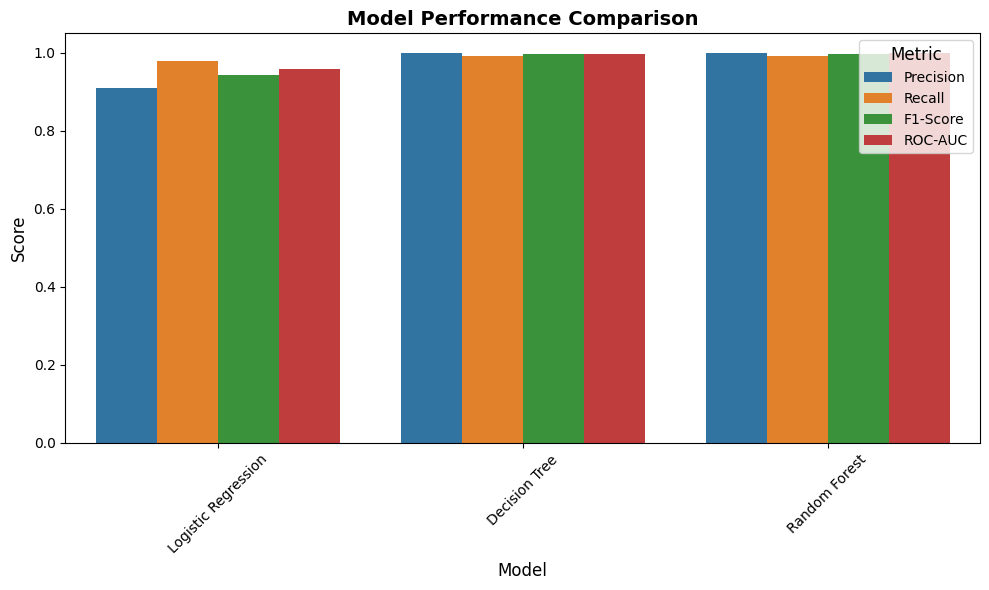

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results.reset_index().melt(id_vars='index'), 
            x='index', y='value', hue='variable')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.legend(title='Metric', title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Feature Importance Analysis

Analyze which features are most important for credit scoring (using Random Forest).

Feature Importance (Random Forest):
           feature  importance
2  payment_history    0.317650
0           income    0.279532
4   debt_to_income    0.195958
1            debts    0.189502
3              age    0.017358


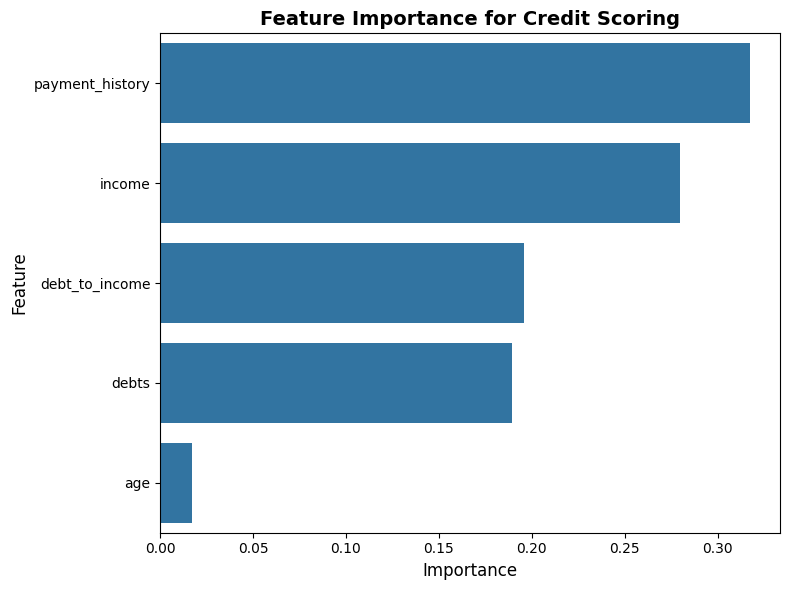

In [ ]:
# Get feature importance from Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print('Feature Importance (Random Forest):')
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Credit Scoring', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

## Summary

This notebook demonstrates a complete credit scoring pipeline:

1. **Data Simulation**: Created realistic credit data with income, debts, payment history, and age
2. **Feature Engineering**: Added debt-to-income ratio
3. **Data Preprocessing**: Split data and scaled features
4. **Model Training**: Trained Logistic Regression, Decision Tree, and Random Forest models
5. **Evaluation**: Compared models using precision, recall, F1-score, and ROC-AUC
6. **Visualization**: Created performance comparison charts and feature importance analysis

The Random Forest model typically performs best for this type of credit scoring task, providing good balance between interpretability and performance.